# Question 1: Write the equation for the function of the plot shown below in terms of scaled and delayed delta, step, and/or ramp functions. Show your reasoning behind each height change and slope change for full credit.  Points will be taken off for each incorrect (missing, extra, incorrect delay, incorrect scale factor) ramp and step function.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
def u(t):
    return 0.5*(np.sign(t)+1)
def r(t):
    return t*u(t)

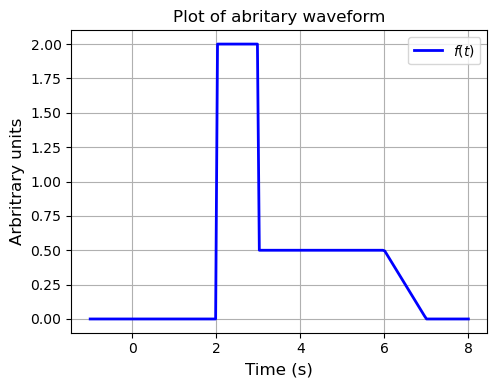

In [2]:
t=np.linspace(-1,8,200)
def f(t):
    return 2*u(t-2)-1.5*u(t-3)-.5*r(t-6)+.5*r(t-7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(left=0.25, bottom=0.25)
legend='$f(t) $'
[line] = ax.plot(t, f(t), linewidth=2, color='blue',label=legend)
ax.set_xlabel('Time (s)',fontsize=12)
ax.set_ylabel('Arbritrary units',fontsize=12) 
ax.legend()
ax.set_title('Plot of abritary waveform')
ax.grid()
plt.show()

At t=2 there is a step up of 2 which is denoted as $2u(t)$, then at t=3, there is a step down of 1.5 (2 to 0.5) which is $-1.5u(t-3)$.  At t=6 there is a negative ramp of -.5 which is $-0.5r(t-6)$ which then flattens out thus the slope at t=7 is equal and opposite which is $0.5r(t-7)$.

$f(t)=2u(t-2)-1.5u(t-3)-.5r(t-6)+.5r(t-7)$

# Question 2: Using any convolution method, find the equation for the convolution and sketch it over time. Make sure to clearly label 5$\tau$, if appropriate. 

$g(t)= u(t)-u(t-10)$

$h(t)=\frac{1}{2}\times e^{-\frac{t}{2}}u(t)$

$f(t)=g(t)*h(t)$

The common convolution is $z(t)=u(t)*e^{-\frac{t}{2}}u(t)$
$z(t)=u(t)*e^{-\frac{t}{2}}u(t)=L^{-1}\left(G(s)\times H(s)=\frac{1}{s} \times \frac{1}{s+\frac{1}{2}} \right)$
$z(t)=\left(1-e^{-\frac{t}{2}} \right)u(t)$

$f(t)=g(t)*h(t)=z(t)-z(t-10)=\left(1-e^{-\frac{t}{2}} \right)u(t)-\left(1-e^{-\frac{t-10}{2}} \right)u(t-10)$

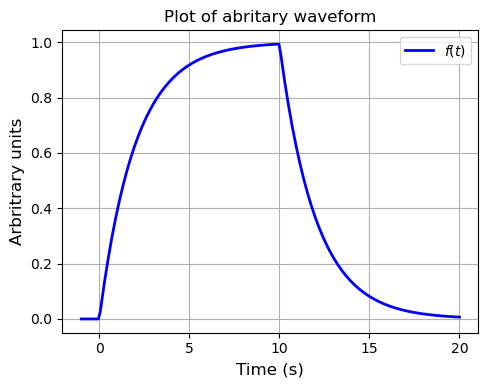

In [3]:
def z(t):
    return u(t)*(1-np.exp(-t/2))
def f(t):
    return z(t)-z(t-10)
t=np.linspace(-1,20,200)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(left=0.25, bottom=0.25)
legend='$f(t) $'
[line] = ax.plot(t, f(t), linewidth=2, color='blue',label=legend)
ax.set_xlabel('Time (s)',fontsize=12)
ax.set_ylabel('Arbritrary units',fontsize=12) 
ax.legend()
ax.set_title('Plot of abritary waveform')
ax.grid()
plt.show()

$5 \tau =10s$ and can been seen for t=0 to 10, and t=10 to 20.

# Q3 Match  the step responses
$h_1(t)=2e^{-t}u(t)$ This function's step response will go from 0 to 2 with an asymptotic approach from 0 to 5s as $tau=1s$.

$h_2(t)=2\left( \delta(t) -e^{-t}u(t) \right)$ This function's step response  will go from 2 to 0 with an exponential decay from 0 to 5s as $tau=1s$.

$h_3(t)=\frac{1}{500m}e^{-\frac{t}{500m}}u(t)$ This function's step response will go from 0 to 1 with an asymptotic approach from 0 to 2.5s as $tau=.5s$.

$h_4(t)=\delta(t)-\frac{1}{500m}e^{-\frac{t}{500m}}u(t)$This function's step response  will go from 1 to 0 with an exponential decay from 0 to 2.5s as $tau=.5s$.



In [4]:
from sympy import *
s =symbols(" s",positive=True)
time, tau =symbols(" time, tau",real=True)
def convolution(g,h):
    #The ().subs method replaces t with tau the dummy variable.
    gtmp=g.subs(time,tau)
    #The ().subs method replaces t with t-tau the dummy variable.
    htmp=h.subs(time,time-tau)
    #use -oo instead of zero, otherwise delta functions will not work.
    #Make sure at least one function multiplied by u(t).
    return integrate(gtmp*htmp,(tau,-oo,time))
h1=2*exp(-time)*Heaviside(time)
g=Heaviside(time)
f1=convolution(h1,g)

The step response of $h_1(t)$=

In [5]:
f1

2*(1 - exp(-time))*Heaviside(time)

In [6]:
h2=2*(DiracDelta(time)-exp(-time)*Heaviside(time))
f2=convolution(h2,g)

The step response of $h_2(t)=$

In [7]:
f2.simplify().expand()

2*Heaviside(time)**2 - 2*Heaviside(time) + 2*exp(-time)*Heaviside(time)

Note: $\left( u(t) \right)^2=u(t)$ so the step response becomes $2e^{-time}u(time)$

In [8]:
h3=1/.5*exp(-time/.5)*Heaviside(time)
f3=convolution(h3,g)

The step response of $h_3(t)=$

In [9]:
f3

(1 - exp(-2*time))*Heaviside(time)

In [10]:
h4=DiracDelta(time)-1/.5*exp(-time/.5)*Heaviside(time)
f4=convolution(h4,g)

The step response of $h_4(t)=$

In [11]:
f4.simplify().expand()

Heaviside(time)**2 - Heaviside(time) + exp(-2*time)*Heaviside(time)

Note: $\left( u(t) \right)^2=u(t)$ so the step response becomes $e^{-2 time}u(time)$

In [12]:
f1= lambdify(time, f1, modules=['numpy'])
f2= lambdify(time, f2, modules=['numpy'])
f3= lambdify(time, f3, modules=['numpy'])
f4= lambdify(time, f4, modules=['numpy'])

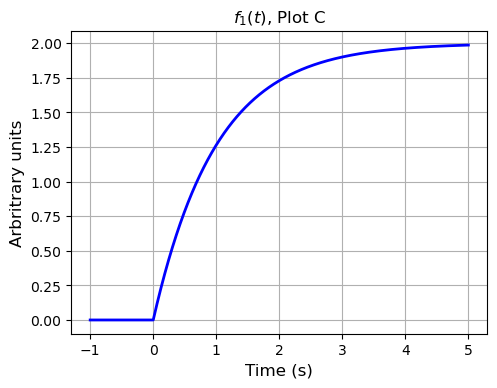

In [13]:
axis_color = 'lightgoldenrodyellow'
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(left=0.25, bottom=0.25)
time = np.arange(-1, 5, 0.001)
[line] = ax.plot(time, f1(time), linewidth=2, color='blue')
ax.set_xlabel('Time (s)',fontsize=12)
ax.set_ylabel('Arbritrary units',fontsize=12) 
plt.title('$f_1(t)$, Plot C')
ax.grid()
plt.show()

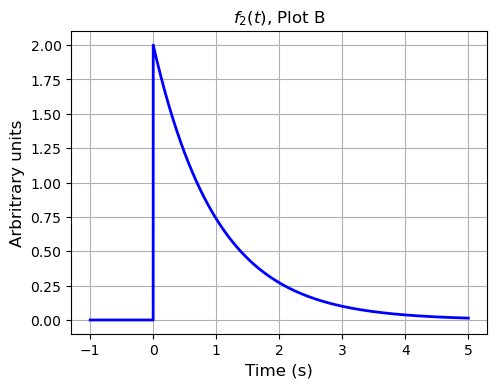

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(left=0.25, bottom=0.25)
[line] = ax.plot(time, f2(time), linewidth=2, color='blue')
ax.set_xlabel('Time (s)',fontsize=12)
ax.set_ylabel('Arbritrary units',fontsize=12) 
plt.title('$f_2(t)$, Plot B')
ax.grid()
plt.show()

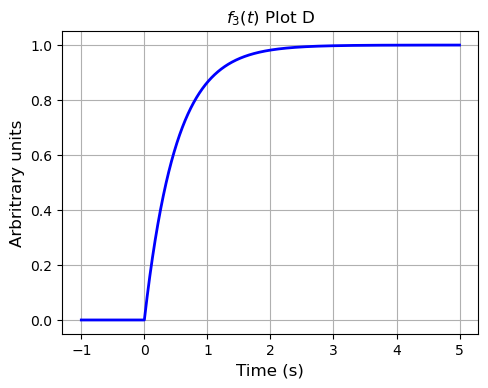

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(left=0.25, bottom=0.25)
[line] = ax.plot(time, f3(time), linewidth=2, color='blue')
ax.set_xlabel('Time (s)',fontsize=12)
ax.set_ylabel('Arbritrary units',fontsize=12) 
plt.title('$f_3(t)$ Plot D')
ax.grid()
plt.show()

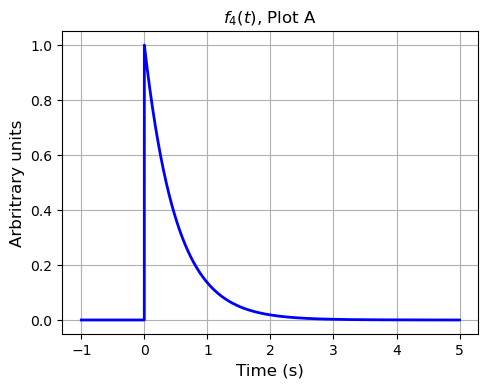

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(left=0.25, bottom=0.25)
time = np.arange(-1, 5, 0.001)
[line] = ax.plot(time, f4(time), linewidth=2, color='blue')
ax.set_xlabel('Time (s)',fontsize=12)
ax.set_ylabel('Arbritrary units',fontsize=12) 
plt.title('$f_4(t)$, Plot A')
ax.grid()
plt.show()

# Q4 Create Bode plot for
$H(s)=100\times \frac{s^2}{(a+10)(s+1000)}$

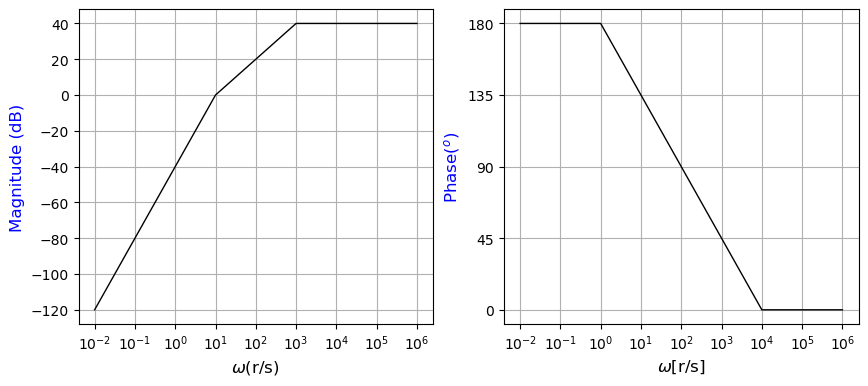

In [17]:

Z=[0,0]
P=[10,1000]
G=100
SN=1
SD=1
wbreak=[]
w_type=[]
equation=' '
phase=' '
for i in Z:
    wbreak.append(i)
    w_type.append("Z")
    if i==0:
        equation=equation+"+20*t"
        phase=phase+"+90"
    if i!=0:
        equation=equation+"+20*r(t-1*{})".format(np.log10(i))
        phase=phase+"+45*r(t-1*{})".format(np.log10(i)-1)
        phase=phase+"-45*r(t-1*{})".format(np.log10(i)+1)
    if i!=0:
        SN=SN*i
for i in P:
    wbreak.append(i)
    w_type.append("P")
    if i==0:
        equation=equation+"-20*t"
        phase=phase+"-90"
    if i!=0:
        equation=equation+"-20*r(t-1*{})".format(np.log10(i))
        phase=phase+"-45*r(t-1*{})".format(np.log10(i)-1)
        phase=phase+"+45*r(t-1*{})".format(np.log10(i)+1)
    if i!=0:
        SD=SD*i

ratio=20*np.log10(SN/SD*G)
equation=equation+"+{}".format(ratio)

w_mag=[]
w_phase=[]
flag=1


for i in range(0,len(wbreak)):

    if wbreak[i]==0:
        w_mag.append(.1)
        w_mag.append(1)
        w_mag.append(10)
    if wbreak[i]!=0:
        w_mag.append(wbreak[i])
        w_mag.append(wbreak[i]/100.)
        w_mag.append(wbreak[i]/10.)
        w_mag.append(wbreak[i]/1000.)
        w_mag.append(wbreak[i]*10.)
        w_mag.append(wbreak[i]*100.)
        w_mag.append(wbreak[i]*1000.)
            
mag=[]
pha=[]

w_mag=np.unique(np.log10(w_mag))


for i in w_mag:

 
    temp=equation.replace("t",str(i))
    temp2=phase.replace("t",str(i))
    mag.append(eval(temp))
    pha.append(eval(temp2))

 
fig, (ax,ax1) = plt.subplots(1,2,figsize=(12,5))  
fig.subplots_adjust(left=0.25, bottom=0.25)        
[line] = ax.semilogx(10**w_mag,mag, linewidth=1, color='black')
[line] = ax1.semilogx(10**w_mag,pha, linewidth=1, color='black')           
ax.set_xticks(10**w_mag)
ax1.set_xticks(10**w_mag)
ytick=np.arange(min(pha),max(pha)+45,45)
 
ax1.set_yticks(ytick)
ax.set_xlabel('$\omega$(r/s)',fontsize=12)
ax.set_ylabel('Magnitude (dB)', color='b', fontsize=12) 
ax1.set_ylabel('Phase($^o$)', color='b', fontsize=12 ) 
ax1.set_xlabel('$\omega$[r/s]',fontsize=12)
ax.grid()
ax1.grid()
plt.show()


# Q5 Derive the transfer function of the following circuit:

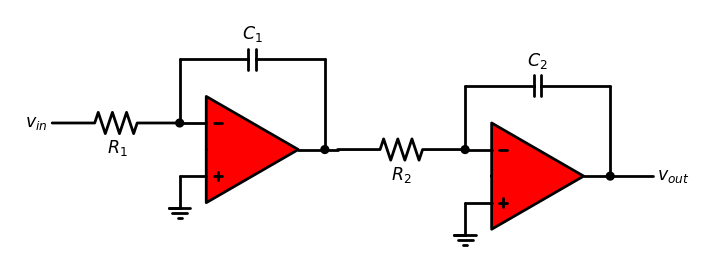

In [18]:
import schemdraw as schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing() as d:
    d += (op := elm.Opamp(leads=True,fill='red'))
    d += elm.Line().down(d.unit/4).at(op.in2)
    d += elm.Ground(lead=False)
    d += (Rin := elm.Resistor().at(op.in1).left().idot().label('$R_{1}$', loc='bot').label('$v_{in}$', loc='left'))
    d += elm.Line().up(d.unit/2).at(op.in1)
    d += elm.Capacitor().tox(op.out).label('$C_1$')
    d += elm.Line().toy(op.out).dot()
    d += elm.Line().right(d.unit/10).at(op.out)
    d += (R2 := elm.Resistor().right().label('$R_{2}$', loc='bot'))
    d += (op2 := elm.Opamp(leads=True,fill='red').anchor('in1'))
    d += elm.Line().down(d.unit/4).at(op2.in2)
    d += elm.Ground(lead=False)
    d += elm.Line().up(d.unit/2).at(op2.in1).idot()
    d += elm.Capacitor().tox(op2.out).label('$C_2$')
    d += elm.Line().toy(op2.out).dot()

    d += elm.Line().right(1).at(op2.out).label('$v_{out}$', loc='rgt')

Assuming and ideal OPAMP, $H_1(s)=-\frac{1}{ s R_1 C_1}$ and $H_2(s)=-\frac{1}{ s R_2 C_2}$ 

$H(s)=\frac{V_{OUT}(s)}{V_{IN}(s)}=H_1(s) \times H_2(s)=\frac{1}{s^2}$

# Q6 
Assume the OPAMP below has the transfer function of:
$H_{opamp}(s)=\frac{10^6}{s}$
Mathematically derive the maximum frequency for which the circuit will behave ideally.


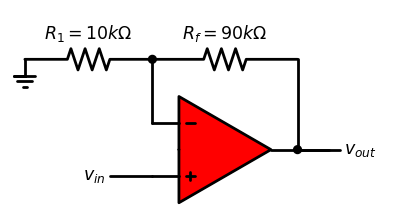

In [19]:
with schemdraw.Drawing() as d:
    d += (op := elm.Opamp(leads=True,fill='red'))
    d += (out := elm.Line(at=op.out).length(.75))
    d += elm.Line().up().at(op.in1).length(1.5).dot()
    d.push()
    d += elm.Resistor().left().label('$R_1=10k \Omega$')
    d += elm.Ground()
    d.pop()
    d += elm.Resistor().tox(op.out).label('$R_f=90k \Omega$')
    d += elm.Line().toy(op.out).dot()
    d += elm.Line().right(1).at(op.out).label('$v_{out}$', loc='rgt')
    d += elm.Line().left(1).at(op.in2).label('$v_{in}$', loc='lft')
    

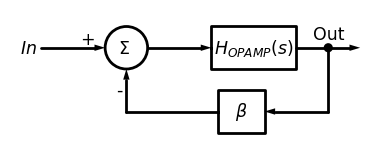

In [20]:
from schemdraw import dsp 
d = schemdraw.Drawing()
a1=d.add(dsp.Arrow(l=d.unit/2).label('+', loc='right',ofst=(-.6, .2)).label('$In$', loc='left'))
sm = d.add(dsp.SumSigma())
a2=d.add(dsp.Arrow(l=d.unit/2))
delay1 = d.add(dsp.Box(w=2, h=1, label='$H_{OPAMP}(s)$', anchor='W'))
a3=d.add(dsp.Arrow('right', l=d.unit/2, xy=delay1.E,label='Out'))
#a4=d.add(dsp.Arrow(xy=sm.S, theta=-90,l=d.unit/2,reverse=True).label('-', loc='right',ofst=(.6, .2)))
d.add(dsp.Dot(xy=a3.center))
l1=d.add(dsp.Line('down', xy=a3.center, l=.5*d.unit))
l2=d.add(dsp.Arrow('left', l=.5*d.unit))
g2 = d.add(dsp.Box(w=1.1, h=1, label='$\\beta$', anchor='E'))
l3=d.add(dsp.Line('left', tox=sm.S, xy=g2.W))
l4=d.add(dsp.Arrow('up', toy=sm.S,label='-'))
d.draw() 
 

In [21]:
R1, R2,Avol,B,Av=symbols("R1, R2, Avol,B,Av", real=True, positive=True)
s, Out, In=symbols("s, Out, In" )
H=Avol/s
Q=solve(Out-H*In+Out*B*H  ,Out)

Let $$H_{OPAMP}(s)=\frac{A_{vol}}{s}$$

In [22]:
H=Avol/s

Put into terms the solver can understand (set expresion to zero)
$$ Out-In\times H_{OPAMP}(s)+Out \times \beta \times H_{OPAMP}(s)=0$$

Use the solver to find Out in terms on In

In [23]:
Q=solve(Out-H*In+Out*B*H  ,Out)

In [24]:
Q[0]

Avol*In/(Avol*B + s)

$\beta=\frac{R_1}{R_1+R_f}=\frac{10k}{10k+90k}=0.1$

$A_{vol}=10^6$

$s=j\omega$

$|j\omega|=\omega$

$|j\omega|<<|A_{vol}\beta|$

$\omega<<A_{vol}\beta$

$\omega<<10^5$

If this is true then the gain of the OPAMP will be $1+\frac{R_f}{R_1}$.

# Q7 
Design a filter with the following specifications: The cutoff frequency of a low-pass filter needs to be 200Hz with a non-inverting DC gain of 10 (20dB).  The attenuation slope needs to be -20dB/dec.  Minimize the number of OPAMPS used.
$H(s)=\frac{2 \pi 1000 }{s+2\pi 1000}$

Given the specification (20dB slope) we will need  a first order low pass filter with a non-inverting gain stage. Assuming an ideal OPAMP circuit $Gain=1+\frac{R_f}{R_{in}}$  One has to assume a value  for one resistor and solve for the other.  One good pair  for a gain of 10 is $R_f=90k\Omega$ and $R_{in}=10k\Omega$.

To design the cutoff frequency use $\frac{1}{R_{filter}C_{filter}}=2\pi1000$  Assume a value for the capacitor and solve for the resistance.

In [25]:
Cfilter=100e-9
wo=2*np.pi*100
Rfilter=1/wo/Cfilter
Rfilter

15915.494309189535

set $R_{filter}=16k\Omega$ .  The circuit can be seen below.

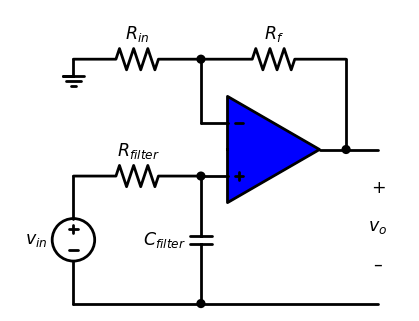

In [26]:
with schemdraw.Drawing() as d:

    d += (op := elm.Opamp(leads=True).fill('blue'))
    d += (out := elm.Line(at=op.out).length(.75))
    d += elm.Line().up().at(op.in1).length(1.5).dot()
    d.push()
    d += elm.Resistor().left().label('$R_{in}$')
    d += elm.Ground()
    d.pop()
    d += elm.Resistor().tox(op.out).label('$R_f$')
    d += elm.Line().toy(op.out).dot()
    d += elm.Resistor().left().at(op.in2).idot().label('$R_{filter}$')
    d += elm.SourceV().down().reverse().label('$v_{in}$')
    d += elm.Line().right().dot()
    d += elm.Capacitor().up().label('$C_{filter}$').hold()
    d += elm.Line().tox(out.end)
    d += elm.Gap().toy(op.out).label(['–','$v_o$','+'])

# Q8   
$H(s)=\frac{100}{s^2+100}$
We can see that the pole is at $\pm 10j$, which is not on the left hand plane, so it it is out of control.  We can see the step response of the system oscillates by taking the inverse Laplace transform of  the transfer function $H(s)$.
$$L^{-}\left(\frac{100}{s^2+100}\right)=sin(10t)u(t)$$

To make a new system that takes the system described by H(s), make a system with an summer, a feedback transfer function, G(s), and the original H(s) function that the system has a block diagram that results in:
$$
Q(s)=\frac{H(s)}{1+G(s)\times  H(s)}
$$
Where $Q(s)$ is the transfer function of the complete system. The figure below is the block diagram of a simple control system that will create Q(s).

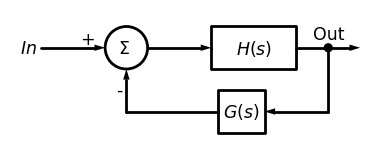

In [27]:
import schemdraw as schem
import schemdraw.elements as e
from schemdraw import dsp 
d = schem.Drawing()
a1=d.add(dsp.Arrow(l=d.unit/2).label('+', loc='right',ofst=(-.6, .2)).label('$In$', loc='left'))
sm = d.add(dsp.SumSigma())
a2=d.add(dsp.Arrow(l=d.unit/2))
delay1 = d.add(dsp.Box(w=2, h=1, label='$H(s)$', anchor='W'))
a3=d.add(dsp.Arrow('right', l=d.unit/2, xy=delay1.E,label='Out'))
#a4=d.add(dsp.Arrow(xy=sm.S, theta=-90,l=d.unit/2,reverse=True).label('-', loc='right',ofst=(.6, .2)))
d.add(dsp.Dot(xy=a3.center))
l1=d.add(dsp.Line('down', xy=a3.center, l=.5*d.unit))
l2=d.add(dsp.Arrow('left', l=.5*d.unit))
g2 = d.add(dsp.Box(w=1.1, h=1, label='$G(s)$', anchor='E'))
l3=d.add(dsp.Line('left', tox=sm.S, xy=g2.W))
l4=d.add(dsp.Arrow('up', toy=sm.S,label='-'))
d.draw()


Now that we have the block diagram for the new system, Q(s), we need to design G(s) to ensure all the poles are int he the LHP.  It can be help to break up H(s) into the numerator and denominator.
$$H(s)=\frac{N(s)}{D(s)}$$
In this example $N(s)=1$, and $D(s)=s-1$.
Substitute N(s) and D(s) into Q(s)
$$Q(s)=\frac{H(s)}{1+G(s)H(s)}=\frac{N(s)}{D(s)}\times\frac{1}{1+G(s)\times\frac{N(s)}{D(s)}}=\frac{N(s)}{D(s)+G(s)\times N(s)}$$

If we look at the above equation we see the numerator of Q(s) is the same as the numerator as H(s), and the original D(s) of H(s) is in Q(s)'s denominator.  What has changed is that the new denominator has a new term summed to the original D(s): G(s)N(s) now to make sure all the poles of Q(s) are int he LHP, we just have to choose a G(s) that makes roots of $D(s)+G(s)N(s)$ all on the LHP.

In this example: 
$$Q(s)=\frac{1}{s^2+100+G(s)\times 1}$$
What $G(s)\times 1$ will turn the real part of the poles at $\pm10j$, negative?
In this case we need proportional feedback times derivative, so $G(s)=sK$.
The pole becomes:
The new Q(s) becomes:
$$Q(s)=\frac{100}{s+100+Ks\times 10}=\frac{100}{s+10Ks+100}$$  if K>0, then the system will be in control.

**How did I determine we needed Ks control?**
If we look at the quadratic equation for D(s) of the original transfer function:
$$Roots_{1,2}(Poles)=\frac{-b\pm \sqrt{b^2-4ac}}{2}$$

a=1, b=0, c= 100
$$Roots_{1,2}(Poles)=\frac{0\pm \sqrt{0-400}}{2}=\pm 10j$$

To have the poles haver a negative real part, we need b to be a positive, real number.

$$Q(s)=\frac{100}{s^2+100+G(s)\times 100}=\frac{1}{s^2+bs+100}$$
where $bs=G(s)\times 100$  Solve for G(s):

$$G(s)=\frac{bs}{100}$$  repalce K for b to put the expression into control format.

$$G(s)=\frac{Ks}{100}$$ 

Now:

$$Q(s)=\frac{100}{s^2+\frac{K}{100}s+100}$$

Substitute back into the quadratic equation:

a=1, b=$\frac{K}{100}$, c= 100
$$Roots_{1,2}(Poles)=\frac{-\frac{K}{100}\pm \sqrt{\left( \frac{K}{100}\right)^2-400}}{2}$$
If K>0  then $\sqrt{\left(\frac{K}{100}\right)^2-400}$ will always be less than $\frac{K}{100}$ and the roots can never be greater than or equal to zero so the system will be in control.  That being said the closer K is to zero, the greater the ration between the imaginary part of the pole will be to the real part of the pole and the system will be more underdamped. (more oscillations)
 

In [28]:
from lcapy import s, j, pi, f, transfer, j2pif,t,exp
from sympy import *
K= symbols("K", positive=True)
import numpy as np
from matplotlib.pyplot import savefig
H=transfer(100/(s**2+100)).simplify()
hi=H(t)
hi


10⋅sin(10⋅t)⋅u(t)

In [29]:
FF=1/s*H
ff=FF(t)
ff

    ⎛ 1    cos(10⋅t)⎞     
100⋅⎜─── - ─────────⎟⋅u(t)
    ⎝100      100   ⎠     

In [30]:
G=s/10*K
 
Q=H/(1+G*H).normal()
Q

       100       
─────────────────
          2      
10⋅K⋅s + s  + 100

In [31]:
Q=Q.subs(K,20)
Q

      100       
────────────────
 2              
s  + 200⋅s + 100

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

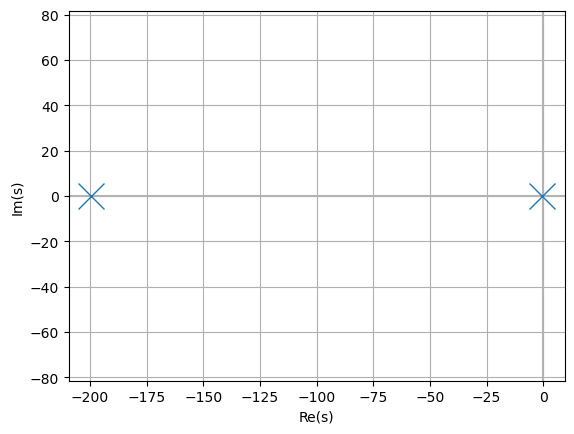

In [32]:
Q.plot()

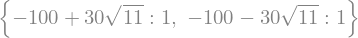

In [33]:
Q.poles()

We can see the  poles are now on the LHP.

(<Axes: xlabel='$\\omega (r/s)$', ylabel='Magnitude(dB)'>,
 <Axes: xlabel='$\\omega (r/s)$', ylabel='Transfer function phase (radians)'>)

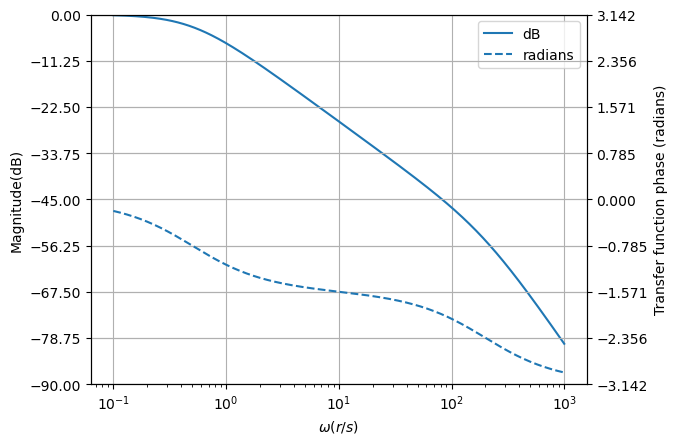

In [34]:
A = Q.subs(j * f)
fv = np.logspace(-1, 3, 400)
A.plot(fv, log_frequency=True,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')

# Q9
This was too hard to recreate in a notebook.  The bode plot is that of a second order low-pass filter because the phase changes by $180^o$ and the slope is 40dB/dec.  Looking at the frequency at which the phase is $-90^o$ or finding the intercept of the low frequency gain and the high frequency slope, $\omega_0=10^4 r/s$.  THe low frequency  Gain is 20dB or 10.  THe magnitude of  the cutoff frequency is around 17dB or $10^{17/20}$.

In [35]:
Gain_LF=10
wo=10^4
Gain_wo=10**(17/20)
Gain_wo

In [36]:
zeta=Gain_LF/Gain_wo/2
zeta

$H(s)=\frac{(10^4)^2}{s^2+2\times .706 \times 10^4 \times s+(10^4)^2}$

# Q10
Shown below are four signals.  Which signals could be turned into a DC power with the application of a filter? (No half-wave rectifiers, full-wave rectifiers, or multipliers.)

What kind of filter do you need to convert the signal?

Which signal would provide the most DC power after filtering?

Explain in as much detail as possible making sure to use the Fourier expansion in your answer. 


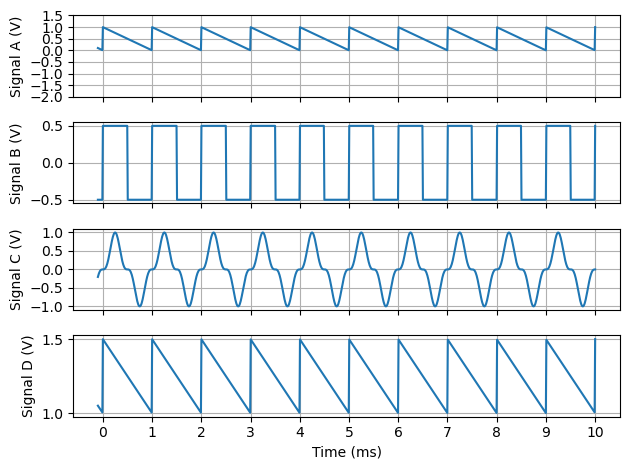

In [37]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

def u(t):
    return 0.5 * (np.sign(t) + 1)
def r(t):
    return t*u(t)

# Simulation time=3s due to delay +15 due to 5tau
t=np.linspace(-.1,10,1000)

major_ticks = np.arange(0, 11, 1)
major_ticksy = np.arange(-2,2,.5)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
ax1.plot(t,.5*(signal.sawtooth(2 * np.pi * 1 * t,width=0)+1))
ax1.set_xticks(major_ticks)
ax1.grid()
ax1.set_yticks(major_ticksy) 
ax2.set_xticks(major_ticks)
ax2.set_yticks(major_ticksy)
ax3.set_xticks(major_ticks)
ax3.set_yticks(major_ticksy)
ax4.set_xticks(major_ticks)
ax4.set_yticks(major_ticksy)
ax2.grid()
ax3.grid()
ax4.grid()
ax4.set_xlabel("Time (ms)")
ax1.set_ylabel("Signal A (V)")
ax2.set_ylabel("Signal B (V)")
ax3.set_ylabel("Signal C (V)")
ax4.set_ylabel("Signal D (V)")
ax2.plot(t,.5*(signal.square(2 * np.pi * 1 * t)))
ax3.plot(t,np.sin(2 * np.pi * 1 * t)**3)
ax4.plot(t,1+.25*(signal.sawtooth(2 * np.pi * 1 * t,width=0)+1))
fig.tight_layout()
plt.show()

The average of signal A is non-zero by inspection, so it can be converted with a low pass filter into a DC power supply.  The average of a signal is the first term of the Fourier expansion and is given by $a_0=\frac{1}{T}\int_0^T x(t)dt=\int_0^T(-t+1)dt$

In [38]:
t=symbols("t", real=True)
a0_A=integrate(-t + 1, (t,0,1))
a0_A

We can see that The average is one half and so this can be filtered with a low pass filter into a DC signal.

The average of signal B is zero by inspection, so it cannot be converted with a low pass filter into a DC power supply.  The average of a signal is the first term of the Fourier expansion and is given by $a_0=\frac{1}{T}\int_0^T x(t)dt=\int_0^{1/2}0.5dt-\int_{1/2}^1 0.5dt$

In [39]:
a0_B=integrate(.5, (t,0,.5))-integrate(.5, (t,.5,1))
a0_B

We can see that the average is zero and so this cannot be filtered with a low pass filter into a DC signal.

The average of signal C is zero by inspection, so it cannot be converted with a low pass filter into a DC power supply.  The average of a signal is the first term of the Fourier expansion and is given by $a_0=\frac{1}{T}\int_0^T x(t)dt=\int_0^1 sin(2 \pi t)^3dt$

In [40]:
a0_C=integrate(sin(2*np.pi*t)**3, (t,0,1)) 
a0_C

We can see that the average is zero and so this cannot be filtered with a low pass filter into a DC signal.

The average of signal D is non-zero by inspection, so it can be converted with a low pass filter into a DC power supply.  The average of a signal is the first term of the Fourier expansion and is given by $a_0=\frac{1}{T}\int_0^T x(t)dt=\int_0^1(-.5t+1)dt$

In [41]:
a0_D=integrate(-.5*t + 1.5, (t,0,1))
a0_D

Given that signal D has the largest $a_0$, it would make the best source to create a DC signal.

0
FFT A
1
FFT B
2
FFT C
3
FFT D


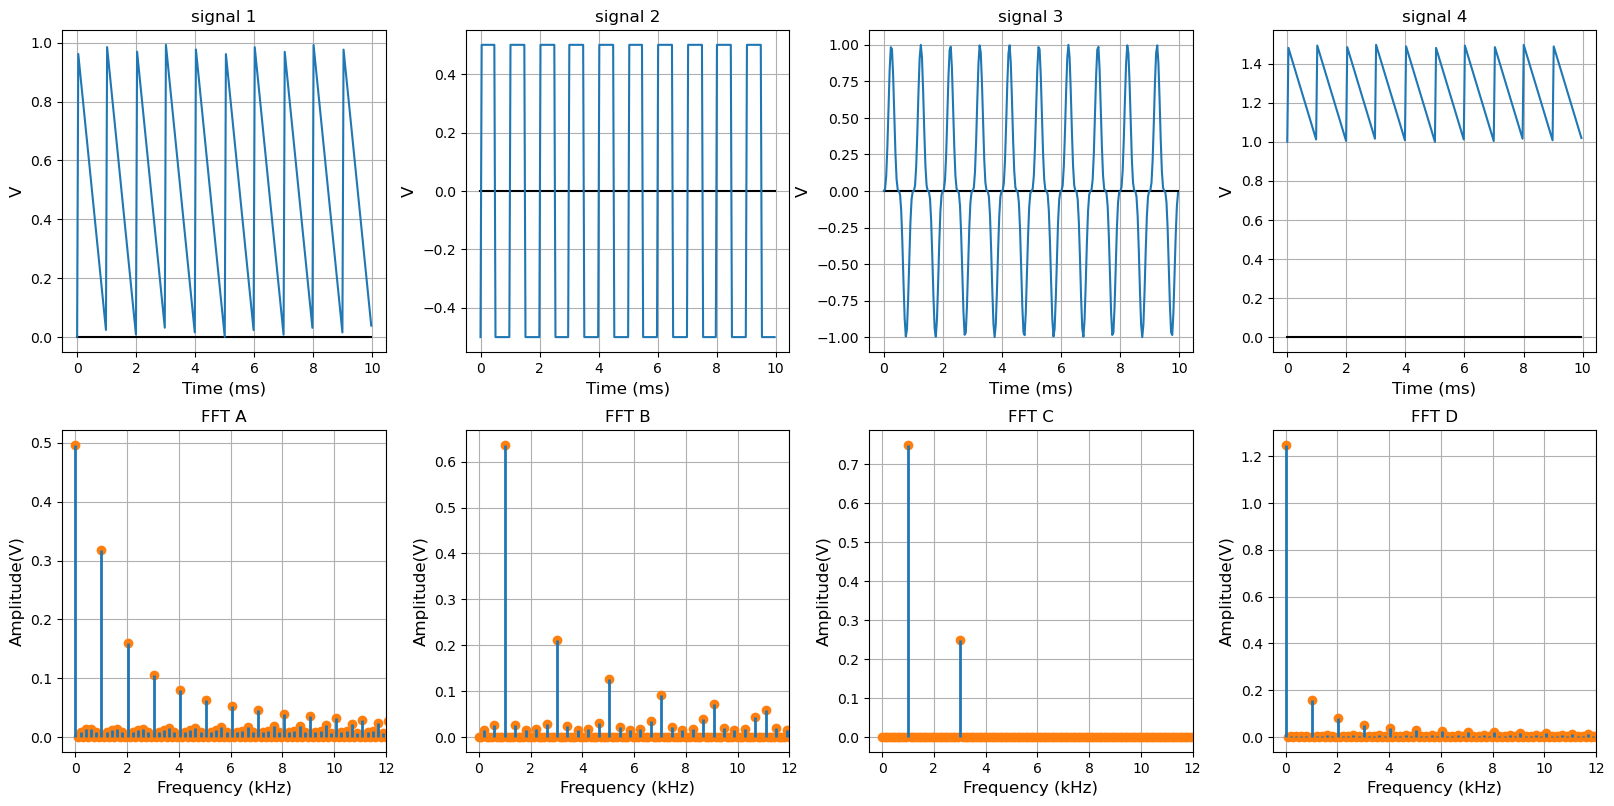

In [42]:
from scipy.fftpack import fft
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
#Amplitude of the square wave
A=1.0
#Freqeuncy in Hz of square wave
F=1
# Numeber of times the square wave is sampled
N = 2**8
 
#Number of periods to simulate
NC=10.  #Make sure to include the ., this makes NC a floating point number.
 
# Simulation time
T=NC/F
dT=T/N
#Create X-axis data
t = np.linspace(-.001, T, N,endpoint=False)
#Create sin wave data
 
#y=A*signal.square(2*np.pi*F*x,duty=D)+1
y=[0,0,0,0]

y[0]=.5*(signal.sawtooth(2 * np.pi * 1 * t,width=0)+1) 
y[1]= .5*(signal.square(2 * np.pi * 1 * t))
y[2]= np.sin(2 * np.pi * 1 * t)**3
y[3]=1+.25*(signal.sawtooth(2 * np.pi * 1 * t,width=0)+1) 
#Create  fake data so that an axis appears at 0
x2 = np.linspace(0.0, T, 2)
y2=x2*0
# Plot sin wave with a closed circle
fig, ((ax, ax1, ax2, ax3),(ax4, ax5, ax6, ax7)) = plt.subplots(2,4,figsize=(16,8))

plotlist=[ax, ax1, ax2, ax3]
plotlist2=[ax4, ax5, ax6, ax7]
k=0
for plot in y:
    plotlist[k].plot(t, t*0,color='black')
    plotlist[k].plot(t, plot)
    plotlist[k].set_title('signal {}'.format(k+1))
    plotlist[k].set_ylabel('V',fontsize=12)
    plotlist[k].set_xlabel('Time (ms)',fontsize=12)
    plotlist[k].grid()
    k=k+1
k=0
AA=["A","B","C","D"]
for plot in y:
    print(k)
    print('FFT {}'.format(AA[k]))  
    yf = fft(plot)
    xf = np.linspace(0.0, 1.0/(2.0*dT), int(N/2))
    yf[0]=yf[0]/2.
    plotlist2[k].plot(xf, xf*0, lw=2)
    plotlist2[k].plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]), 'o', lw=2) 
    plotlist2[k].vlines(xf, [0], 2.0/N * np.abs(yf[0:int(N/2)]), lw=2)
    plotlist2[k].set_xlim(-.5,12)
    plotlist2[k].grid()
    plotlist2[k].set_title('FFT {}'.format(AA[k]))
    plotlist2[k].set_xlabel('Frequency (kHz)',fontsize=12)
    plotlist2[k].set_ylabel('Amplitude(V)',fontsize=12)
    k=k+1
plt.tight_layout(pad=0.5, w_pad=.5, h_pad=1.0)  
plt.show()

Looking at the figure above we see that the fundamental frequency for all signals is 1kHz, and the first term in the FFT ($a_0$) is 0.5,0,0,ans 1.25 for signals 1,2,3, and 4 (FFT A, B,C, and D).  We want to pass everything near zero and block everything with a non-zero frequency.  Only a low-pass filer can do this without the sue of a rectifier.

[It was too hard to complete the explanation in the notebook so here is a video.](https://www.youtube.com/watch?v=Awq-Lk34ezc&feature=youtu.be)

 